# This is a simple random forest model for credit card fraud
# Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
using Queryverse
using DataFrames
using CSV
using Plots
using StatsBase
using MLMetrics
using  MLDataPattern
using DecisionTree

In [68]:
df = CSV.read("creditcard.csv") |> DataFrame

,Time,V1,V2,V3,V4,V5,V6
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388
2,0.0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608
3,1.0,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005
4,1.0,-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472
5,2.0,-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215
6,2.0,-0.425966,0.960523,1.14111,-0.168252,0.420987,-0.0297276
7,4.0,1.22966,0.141004,0.0453708,1.20261,0.191881,0.272708
8,7.0,-0.644269,1.41796,1.07438,-0.492199,0.948934,0.428118
9,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.6696,3.72182


In [3]:
names(df)

31-element Array{Symbol,1}:
 :Time  
 :V1    
 :V2    
 :V3    
 :V4    
 :V5    
 :V6    
 :V7    
 :V8    
 :V9    
 :V10   
 :V11   
 :V12   
 ⋮      
 :V19   
 :V20   
 :V21   
 :V22   
 :V23   
 :V24   
 :V25   
 :V26   
 :V27   
 :V28   
 :Amount
 :Class 

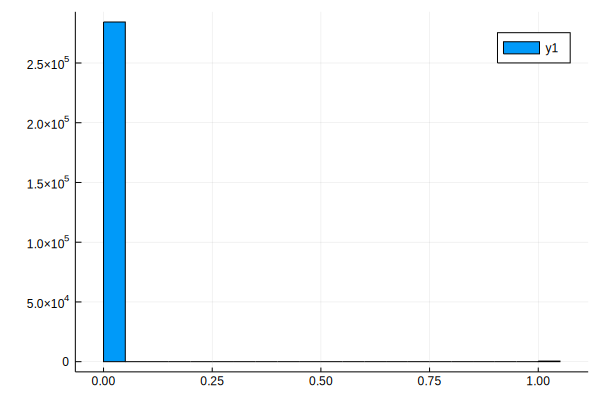

In [5]:
histogram(df[!, :Class])

In [16]:
countmap(df[!, :Class])

Dict{Int64,Int64} with 2 entries:
  0 => 284315
  1 => 492

In [110]:
#The dataset is highly unbalanced, lets treat it, I will separe the classes and undersample the
# 0 class

X = convert(Array, df[!, Not(:Class)])
y = convert(Array, df[!, :Class])

284807-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [121]:
#Balancing the dataset using undersample
Xb, yb = undersample((transpose(X), y), shuffle = true)


([134769.0 119383.0 … 153761.0 155965.0; -0.967767 2.13467 … 1.14626 -1.2014; … ; 0.162777 -0.0114281 … 0.243744 -0.0531328; 925.31 19.99 … 51.37 0.77], [1, 0, 0, 1, 0, 0, 1, 0, 1, 0  …  1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

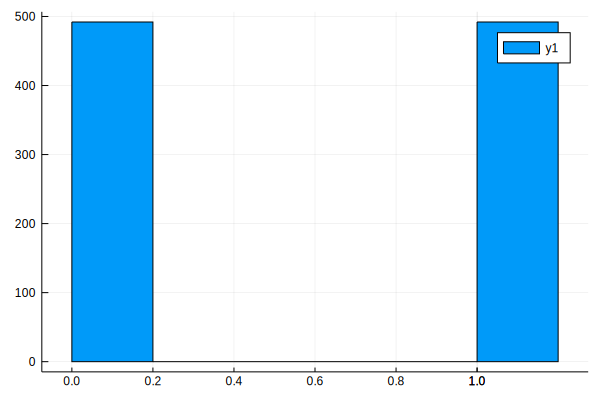

In [122]:
#Now checking the balance
histogram(yb)

In [150]:
#Now it seems ok, lets proceed with the models
#Concatenating balanced datasets and spliting in train and test

data = hcat(transpose(Xb),yb)
train, test = splitobs(transpose(data), at = 0.7)

([134769.0 119383.0 … 103808.0 21419.0; -0.967767 2.13467 … -4.51734 -17.4677; … ; 925.31 19.99 … 2.27 1.0; 1.0 0.0 … 1.0 1.0], [52048.0 155548.0 … 153761.0 155965.0; 1.16199 1.87823 … 1.14626 -1.2014; … ; 0.25 7.06 … 51.37 0.77; 0.0 1.0 … 1.0 1.0])

In [154]:
#We need transpose the matrix because of the return of splitobs
train = transpose(train)
test = transpose(test)

295×31 LinearAlgebra.Transpose{Float64,SubArray{Float64,2,LinearAlgebra.Transpose{Float64,Array{Float64,2}},Tuple{Base.Slice{Base.OneTo{Int64}},UnitRange{Int64}},false}}:
  52048.0    1.16199    0.0310588    1.13451    …   0.0235146     0.25  0.0
 155548.0    1.87823    1.32563     -2.33347        0.00523767    7.06  1.0
  48925.0   -1.02228    0.8982       0.771527       0.00940299   89.99  0.0
  12597.0   -2.58962    7.01671    -13.7054         0.789687      1.0   1.0
  93879.0  -12.8336     7.50879    -20.492         -0.720557    104.03  1.0
 134983.0    1.90249   -0.504231    -0.331407   …  -0.0359467    56.0   0.0
  84694.0   -4.86811    1.26442     -5.16789       -0.127944     12.31  1.0
 116166.0   -0.173582   0.126423     0.62324       -0.0958664    29.0   0.0
  18690.0  -15.3988     7.47232    -19.0269        -1.17806       1.0   1.0
 132121.0    2.28389   -0.771573    -1.60529       -0.0645799     3.95  0.0
  25095.0    1.1924     1.33897     -0.678876   …   0.0736054     3.1

In [183]:
#Selecting features and labels from train and test dataset
X_train = train[:, 1:30]
y_train = train[:, 31]

X_test = test[:, 1:30]
y_test = test[:, 31]

295-element Array{Float64,1}:
 0.0
 1.0
 0.0
 1.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 ⋮  
 1.0
 0.0
 1.0
 1.0
 1.0
 1.0
 0.0
 0.0
 1.0
 0.0
 1.0
 1.0

In [179]:
#Random forest model
model = build_forest(y, X)

Ensemble of Decision Trees
Trees:      10
Avg Leaves: 150.7
Avg Depth:  18.7

In [193]:
#Running the model
test_results = Vector{Int32}()
for i=1:size(X_test,1)
    result = apply_forest(model, X_test[i,:])
    append!(test_results, result)
end

In [212]:
#Accuracy
hit = 0
fail = 0
for i=1:length(test_results)
    if test_results[i] == y_test[i]
        hit += 1
    else
        fail += 1
    end
end

# Hits

In [215]:
hit

283

# Fail

In [216]:
fail

12

# Precision

In [217]:
hit / (hit + fail)

0.9593220338983051

# Confusion Matrix

In [232]:
[true_positives(y_test, test_results) false_positives(y_test, test_results); 
 true_negatives(y_test, test_results) false_negatives(y_test, test_results)]

2×2 Array{Int64,2}:
 145   0
 138  12

# Test dataset balance

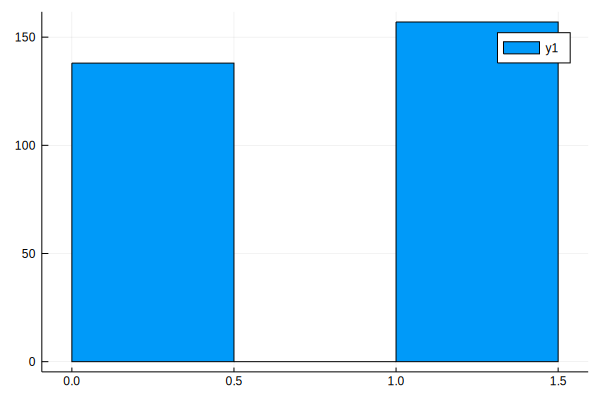

In [218]:
histogram(y_test)